In [3]:
!pip install pandas numpy scipy statsmodels plotly matplotlib

In [2]:
import os 
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import plotly.express as px

# Import and prelim formatting of data

In [3]:
proteomics = pd.read_csv(os.path.join("_data", "proteomics_raw.txt"), sep="\t")
metabolomics = pd.read_csv(os.path.join("_data", "metabolomics.tsv"), sep="\t", index_col=0, encoding = "ISO-8859-1")

In [4]:
# Check that copied gene names are correct
# proteomics.loc[proteomics["Protein"] != proteomics["PROTEIN_ORIGINAL"]]

In [5]:
protein_label = "Gene"

proteomics.index = proteomics[protein_label]
proteomics = proteomics.drop(["Gene", "Protein", "PROTEIN_ORIGINAL"], axis=1)
proteomics.index.name = None

# Create Fold Change tables
#### Stiffness
- 400 vs 60k in HPLM
- 400 vs 60k in DMEM
- 400 vs 60k in HPLM in 15mM Glucose
- 400 vs 60k in DMEM in 15mM Glucose

#### Media
- 60k in HPLM vs DMEM
- 400 in HPLM vs DMEM
- 60k in HPLM vs DMEM in 15mM Glucose
- 400 in HPLM vs DMEM in 15mM Glucose

## Proteomics

In [6]:
proteomics_results = pd.DataFrame(index=proteomics.index)

In [7]:
proteomics_results["400_vs_60k_in_HPLM_fc"] = np.log2(
    (proteomics[["x400xH5-1", "x400xH5-2", "x400xH5-3"]].mean(axis=1, skipna=True) /
     proteomics[["x60kxH5-1", "x60kxH5-2", "x60kxH5-3"]].mean(axis=1, skipna=True)))

proteomics_results["400_vs_60k_in_DMEM_fc"] = np.log2(
    (proteomics[["x400x5-1", "x400x5-2", "x400x5-3"]].mean(axis=1, skipna=True) / 
     proteomics[["x60kx5-1", "x60kx5-2", "x60kx5-3"]].mean(axis=1, skipna=True)))

proteomics_results["400_vs_60k_in_HPLM_15mM_Glucose_fc"] = np.log2(
    (proteomics[["x400xH15-1", "x400xH15-2", "x400xH15-3"]].mean(axis=1, skipna=True) /
     proteomics[["x60kxH15-1", "x60kxH15-2", "x60kxH15-3"]].mean(axis=1, skipna=True)))

proteomics_results["400_vs_60k_in_DMEM_15mM_Glucose_fc"] = np.log2(
    (proteomics[["x400x15-1", "x400x15-2", "x400x15-3"]].mean(axis=1, skipna=True) /
     proteomics[["x60kx15-1", "x60kx15-2", "x60kx15-3"]].mean(axis=1, skipna=True)))


proteomics_results["60k_HPLM_vs_DMEM_fc"] = np.log2(
    (proteomics[["x60kxH5-1", "x60kxH5-2", "x60kxH5-3"]].mean(axis=1, skipna=True) /
     proteomics[["x60kx5-1", "x60kx5-2", "x60kx5-3"]].mean(axis=1, skipna=True)))

proteomics_results["400_HPLM_vs_DMEM_fc"] = np.log2(
    (proteomics[["x400xH5-1", "x400xH5-2", "x400xH5-3"]].mean(axis=1, skipna=True) / 
     proteomics[["x400x5-1", "x400x5-2", "x400x5-3"]].mean(axis=1, skipna=True)))

proteomics_results["60k_HPLM_vs_DMEM_15mM_Glucose_fc"] = np.log2(
    (proteomics[["x60kxH15-1", "x60kxH15-2", "x60kxH15-3"]].mean(axis=1, skipna=True) /
     proteomics[["x60kx15-1", "x60kx15-2", "x60kx15-3"]].mean(axis=1, skipna=True)))

proteomics_results["400_HPLM_vs_DMEM_15mM_Glucose_fc"] = np.log2(
    (proteomics[["x400xH15-1", "x400xH15-2", "x400xH15-3"]].mean(axis=1, skipna=True) / 
     proteomics[["x400x15-1", "x400x15-2", "x400x15-3"]].mean(axis=1, skipna=True)))

In [8]:
proteomics_results.replace([np.inf, -np.inf], np.nan, inplace=False).dropna().describe()

,400_vs_60k_in_HPLM_fc,400_vs_60k_in_DMEM_fc,400_vs_60k_in_HPLM_15mM_Glucose_fc,400_vs_60k_in_DMEM_15mM_Glucose_fc,60k_HPLM_vs_DMEM_fc,400_HPLM_vs_DMEM_fc,60k_HPLM_vs_DMEM_15mM_Glucose_fc,400_HPLM_vs_DMEM_15mM_Glucose_fc
count,6641.000000,6641.000000,6641.000000,6641.000000,6641.000000,6641.000000,6641.000000,6641.000000
mean,0.016473,0.013908,0.000309,-0.003542,-0.005992,-0.003427,-0.016436,-0.012585
std,0.071230,0.067248,0.064760,0.058523,0.069866,0.075256,0.067663,0.077063
min,-0.619952,-0.584407,-0.703221,-0.703683,-0.626483,-0.806528,-0.576250,-0.733345
25%,-0.011846,-0.013854,-0.019109,-0.019323,-0.030821,-0.033298,-0.042568,-0.042275
50%,0.012906,0.010832,0.003359,-0.001866,-0.002116,0.000478,-0.014881,-0.006944
75%,0.042806,0.040391,0.024297,0.014464,0.021612,0.029487,0.009565,0.020161
max,0.597329,0.584278,0.802891,0.615804,0.616442,0.567630,0.499107,0.561995


<Axes: ylabel='Density'>

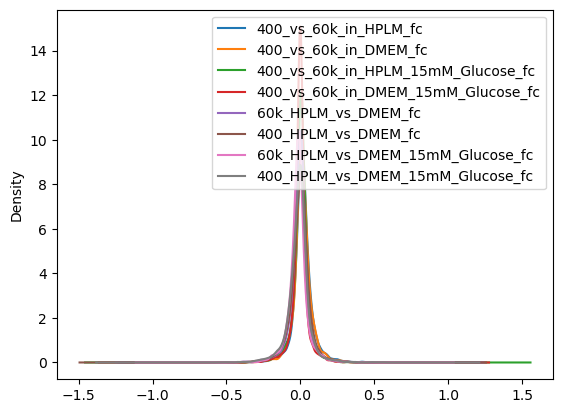

In [9]:
proteomics_results.replace([np.inf, -np.inf], np.nan, inplace=False).dropna().plot.density()

In [10]:
proteomics_results["400_vs_60k_in_HPLM_p"] = ttest_ind(
    proteomics[["x400xH5-1", "x400xH5-2", "x400xH5-3"]],
    proteomics[["x60kxH5-1", "x60kxH5-2", "x60kxH5-3"]], 
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

proteomics_results["400_vs_60k_in_DMEM_p"] = ttest_ind(
    proteomics[["x400x5-1", "x400x5-2", "x400x5-3"]],
    proteomics[["x60kx5-1", "x60kx5-2", "x60kx5-3"]], 
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

proteomics_results["400_vs_60k_in_HPLM_15mM_Glucose_p"] = ttest_ind(
    proteomics[["x400xH15-1", "x400xH15-2", "x400xH15-3"]],
    proteomics[["x60kxH15-1", "x60kxH15-2", "x60kxH15-3"]], 
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

proteomics_results["400_vs_60k_in_DMEM_15mM_Glucose_p"] = ttest_ind(
    proteomics[["x400x15-1", "x400x15-2", "x400x15-3"]],
    proteomics[["x60kx15-1", "x60kx15-2", "x60kx15-3"]], 
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

proteomics_results["60k_HPLM_vs_DMEM_p"] = ttest_ind(
    proteomics[["x60kxH5-1", "x60kxH5-2", "x60kxH5-3"]], 
    proteomics[["x60kx5-1", "x60kx5-2", "x60kx5-3"]],
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

proteomics_results["400_HPLM_vs_DMEM_p"] = ttest_ind(
    proteomics[["x400xH5-1", "x400xH5-2", "x400xH5-3"]], 
    proteomics[["x400x5-1", "x400x5-2", "x400x5-3"]],
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

proteomics_results["60k_HPLM_vs_DMEM_15mM_Glucose_p"] = ttest_ind(
    proteomics[["x60kxH15-1", "x60kxH15-2", "x60kxH15-3"]], 
    proteomics[["x60kx15-1", "x60kx15-2", "x60kx15-3"]],
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

proteomics_results["400_HPLM_vs_DMEM_15mM_Glucose_p"] = ttest_ind(
    proteomics[["x400xH15-1", "x400xH15-2", "x400xH15-3"]], 
    proteomics[["x400x15-1", "x400x15-2", "x400x15-3"]],
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

In [11]:
proteomics_results = proteomics_results.replace([np.inf, -np.inf], np.nan, inplace=False).dropna()

In [12]:
proteomics_results["400_vs_60k_in_HPLM_fdr"] = multipletests(
    proteomics_results["400_vs_60k_in_HPLM_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

proteomics_results["400_vs_60k_in_DMEM_fdr"] = multipletests(
    proteomics_results["400_vs_60k_in_DMEM_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

proteomics_results["400_vs_60k_in_HPLM_15mM_Glucose_fdr"] = multipletests(
    proteomics_results["400_vs_60k_in_HPLM_15mM_Glucose_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

proteomics_results["400_vs_60k_in_DMEM_15mM_Glucose_fdr"] = multipletests(
    proteomics_results["400_vs_60k_in_DMEM_15mM_Glucose_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

proteomics_results["60k_HPLM_vs_DMEM_fdr"] = multipletests(
    proteomics_results["60k_HPLM_vs_DMEM_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

proteomics_results["400_HPLM_vs_DMEM_fdr"] = multipletests(
    proteomics_results["400_HPLM_vs_DMEM_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

proteomics_results["60k_HPLM_vs_DMEM_15mM_Glucose_fdr"] = multipletests(
    proteomics_results["60k_HPLM_vs_DMEM_15mM_Glucose_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

proteomics_results["400_HPLM_vs_DMEM_15mM_Glucose_fdr"] = multipletests(
    proteomics_results["400_HPLM_vs_DMEM_15mM_Glucose_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

In [13]:
proteomics_results.describe()

,400_vs_60k_in_HPLM_fc,400_vs_60k_in_DMEM_fc,400_vs_60k_in_HPLM_15mM_Glucose_fc,400_vs_60k_in_DMEM_15mM_Glucose_fc,60k_HPLM_vs_DMEM_fc,400_HPLM_vs_DMEM_fc,60k_HPLM_vs_DMEM_15mM_Glucose_fc,400_HPLM_vs_DMEM_15mM_Glucose_fc,400_vs_60k_in_HPLM_p,400_vs_60k_in_DMEM_p,...,60k_HPLM_vs_DMEM_15mM_Glucose_p,400_HPLM_vs_DMEM_15mM_Glucose_p,400_vs_60k_in_HPLM_fdr,400_vs_60k_in_DMEM_fdr,400_vs_60k_in_HPLM_15mM_Glucose_fdr,400_vs_60k_in_DMEM_15mM_Glucose_fdr,60k_HPLM_vs_DMEM_fdr,400_HPLM_vs_DMEM_fdr,60k_HPLM_vs_DMEM_15mM_Glucose_fdr,400_HPLM_vs_DMEM_15mM_Glucose_fdr
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,...,6277.000000,6277.000000,6277.000000,6277.000000,6.277000e+03,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,0.015956,0.013341,0.002063,-0.003471,-0.005445,-0.002830,-0.018079,-0.012545,0.401268,0.428728,...,0.435647,0.329411,0.712089,0.808400,9.999706e-01,0.831008,0.801122,0.699924,0.808995,0.507660
std,0.064024,0.061780,0.057732,0.051874,0.064319,0.068136,0.062599,0.070624,0.289272,0.283007,...,0.288622,0.291641,0.156751,0.086687,8.305130e-14,0.123729,0.113774,0.169238,0.111240,0.262108
min,-0.556929,-0.355623,-0.703221,-0.703683,-0.436171,-0.806528,-0.576250,-0.523955,0.000001,0.000224,...,0.000017,0.000004,0.008493,0.730800,9.999706e-01,0.086372,0.026056,0.294781,0.053603,0.022884
25%,-0.011393,-0.013304,-0.017198,-0.018632,-0.029694,-0.032306,-0.042486,-0.041203,0.147055,0.187050,...,0.182102,0.067544,0.587094,0.734223,9.999706e-01,0.764986,0.724799,0.551703,0.725584,0.269914
50%,0.012638,0.010566,0.003712,-0.001866,-0.001939,0.000574,-0.015378,-0.006925,0.348579,0.380936,...,0.400869,0.242646,0.697047,0.761395,9.999706e-01,0.835452,0.792596,0.700338,0.801028,0.485013
75%,0.040740,0.038659,0.024043,0.013699,0.020809,0.028450,0.007996,0.019443,0.628911,0.655653,...,0.676584,0.546907,0.838178,0.874157,9.999706e-01,0.930236,0.885931,0.842644,0.901853,0.729171
max,0.438808,0.584278,0.802891,0.615804,0.572086,0.458815,0.397995,0.553443,0.999816,0.999465,...,0.999097,0.998822,0.999816,0.999465,9.999706e-01,0.999399,0.999761,0.999801,0.999097,0.998822


In [14]:
proteomics_results['protein'] = proteomics_results.index

## Metabolomics

In [15]:
metabolomics_results = pd.DataFrame(index=metabolomics.index)

In [16]:
metabolomics_results["400_vs_60k_in_HPLM_fc"] = np.log2(
    (metabolomics[['HPLM-400_Exp1', 'HPLM-400_Exp2', 'HPLM-400_Exp3']].mean(axis=1, skipna=True) /
     metabolomics[['HPLM-60k_Exp1', 'HPLM-60k_Exp2', 'HPLM-60k_Exp3']].mean(axis=1, skipna=True)))

metabolomics_results["400_vs_60k_in_DMEM_fc"] = np.log2(
    (metabolomics[['400_Exp1', '400_Exp2', '400_Exp3']].mean(axis=1, skipna=True) /
     metabolomics[['60k_Exp1', '60k_Exp2', '60k_Exp3',]].mean(axis=1, skipna=True)))

metabolomics_results["400_vs_60k_in_HPLM_15mM_Glucose_fc"] = np.log2(
    (metabolomics[['HG-HPLM-400_Exp1', 'HG-HPLM-400_Exp2', 'HG-HPLM-400_Exp3']].mean(axis=1, skipna=True) /
     metabolomics[['HG-HPLM-60k_Exp1', 'HG-HPLM-60k_Exp2', 'HG-HPLM-60k_Exp3']].mean(axis=1, skipna=True)))

metabolomics_results["400_vs_60k_in_DMEM_15mM_Glucose_fc"] = np.log2(
    (metabolomics[['HG-400_Exp1', 'HG-400_Exp2', 'HG-400_Exp3']].mean(axis=1, skipna=True) /
     metabolomics[['HG-60k_Exp1', 'HG-60k_Exp2', 'HG-60k_Exp3',]].mean(axis=1, skipna=True)))

metabolomics_results["60k_HPLM_vs_DMEM_fc"] = np.log2(
    (metabolomics[['HPLM-60k_Exp1', 'HPLM-60k_Exp2', 'HPLM-60k_Exp3']].mean(axis=1, skipna=True) / 
     metabolomics[['60k_Exp1', '60k_Exp2', '60k_Exp3']].mean(axis=1, skipna=True)))

metabolomics_results["400_HPLM_vs_DMEM_fc"] = np.log2(
    (metabolomics[['HPLM-400_Exp1', 'HPLM-400_Exp2', 'HPLM-400_Exp3']].mean(axis=1, skipna=True) / 
     metabolomics[['400_Exp1', '400_Exp2', '400_Exp3']].mean(axis=1, skipna=True)))

metabolomics_results["60k_HPLM_vs_DMEM_15mM_Glucose_fc"] = np.log2(
    (metabolomics[['HG-HPLM-60k_Exp1', 'HG-HPLM-60k_Exp2', 'HG-HPLM-60k_Exp3']].mean(axis=1, skipna=True) / 
     metabolomics[['HG-60k_Exp1', 'HG-60k_Exp2', 'HG-60k_Exp3']].mean(axis=1, skipna=True)))

metabolomics_results["400_HPLM_vs_DMEM_15mM_Glucose_fc"] = np.log2(
    (metabolomics[['HG-HPLM-400_Exp1', 'HG-HPLM-400_Exp2', 'HG-HPLM-400_Exp3']].mean(axis=1, skipna=True) / 
     metabolomics[['HG-400_Exp1', 'HG-400_Exp2', 'HG-400_Exp3']].mean(axis=1, skipna=True)))


/Users/jberg/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jberg/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jberg/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jberg/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jberg/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jberg/miniconda3/lib/python3.10/site-packages/pandas/core/

<Axes: ylabel='Density'>

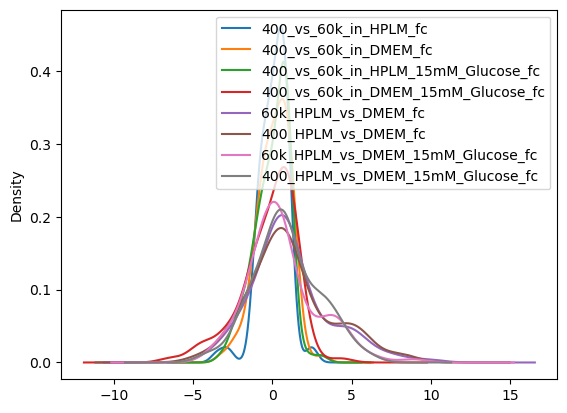

In [17]:
metabolomics_results.replace([np.inf, -np.inf], np.nan, inplace=False).dropna().plot.density()

In [18]:
metabolomics_results["400_vs_60k_in_HPLM_p"] = ttest_ind(
    metabolomics[['HPLM-400_Exp1', 'HPLM-400_Exp2', 'HPLM-400_Exp3']],
    metabolomics[['HPLM-60k_Exp1', 'HPLM-60k_Exp2', 'HPLM-60k_Exp3']], 
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

metabolomics_results["400_vs_60k_in_DMEM_p"] = ttest_ind(
    metabolomics[['400_Exp1', '400_Exp2', '400_Exp3']],
    metabolomics[['60k_Exp1', '60k_Exp2', '60k_Exp3']], 
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

metabolomics_results["400_vs_60k_in_HPLM_15mM_Glucose_p"] = ttest_ind(
    metabolomics[['HG-HPLM-400_Exp1', 'HG-HPLM-400_Exp2', 'HG-HPLM-400_Exp3']],
    metabolomics[['HG-HPLM-60k_Exp1', 'HG-HPLM-60k_Exp2', 'HG-HPLM-60k_Exp3']], 
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

metabolomics_results["400_vs_60k_in_DMEM_15mM_Glucose_p"] = ttest_ind(
    metabolomics[['HG-400_Exp1', 'HG-400_Exp2', 'HG-400_Exp3']],
    metabolomics[['HG-60k_Exp1', 'HG-60k_Exp2', 'HG-60k_Exp3']], 
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

metabolomics_results["60k_HPLM_vs_DMEM_p"] = ttest_ind(
    metabolomics[['HPLM-60k_Exp1', 'HPLM-60k_Exp2', 'HPLM-60k_Exp3']], 
    metabolomics[['60k_Exp1', '60k_Exp2', '60k_Exp3']],
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

metabolomics_results["400_HPLM_vs_DMEM_p"] = ttest_ind(
    metabolomics[['HPLM-400_Exp1', 'HPLM-400_Exp2', 'HPLM-400_Exp3']], 
    metabolomics[['400_Exp1', '400_Exp2', '400_Exp3']],
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

metabolomics_results["60k_HPLM_vs_DMEM_15mM_Glucose_p"] = ttest_ind(
    metabolomics[['HG-HPLM-60k_Exp1', 'HG-HPLM-60k_Exp2', 'HG-HPLM-60k_Exp3']], 
    metabolomics[['HG-60k_Exp1', 'HG-60k_Exp2', 'HG-60k_Exp3']],
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

metabolomics_results["400_HPLM_vs_DMEM_15mM_Glucose_p"] = ttest_ind(
    metabolomics[['HG-HPLM-400_Exp1', 'HG-HPLM-400_Exp2', 'HG-HPLM-400_Exp3']], 
    metabolomics[['HG-400_Exp1', 'HG-400_Exp2', 'HG-400_Exp3']],
    equal_var=False,
    nan_policy="omit", 
    axis=1)[1]

In [19]:
metabolomics_results = metabolomics_results.replace([np.inf, -np.inf], np.nan, inplace=False).dropna()

In [20]:
metabolomics_results["400_vs_60k_in_HPLM_fdr"] = multipletests(
    metabolomics_results["400_vs_60k_in_HPLM_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

metabolomics_results["400_vs_60k_in_DMEM_fdr"] = multipletests(
    metabolomics_results["400_vs_60k_in_DMEM_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

metabolomics_results["400_vs_60k_in_HPLM_15mM_Glucose_fdr"] = multipletests(
    metabolomics_results["400_vs_60k_in_HPLM_15mM_Glucose_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

metabolomics_results["400_vs_60k_in_DMEM_15mM_Glucose_fdr"] = multipletests(
    metabolomics_results["400_vs_60k_in_DMEM_15mM_Glucose_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

metabolomics_results["60k_HPLM_vs_DMEM_fdr"] = multipletests(
    metabolomics_results["60k_HPLM_vs_DMEM_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

metabolomics_results["400_HPLM_vs_DMEM_fdr"] = multipletests(
    metabolomics_results["400_HPLM_vs_DMEM_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

metabolomics_results["60k_HPLM_vs_DMEM_15mM_Glucose_fdr"] = multipletests(
    metabolomics_results["60k_HPLM_vs_DMEM_15mM_Glucose_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

metabolomics_results["400_HPLM_vs_DMEM_15mM_Glucose_fdr"] = multipletests(
    metabolomics_results["400_HPLM_vs_DMEM_15mM_Glucose_p"].values,
    alpha=0.1,
    method="fdr_bh",
    is_sorted=False)[1]

In [21]:
metabolomics_results.describe()

,400_vs_60k_in_HPLM_fc,400_vs_60k_in_DMEM_fc,400_vs_60k_in_HPLM_15mM_Glucose_fc,400_vs_60k_in_DMEM_15mM_Glucose_fc,60k_HPLM_vs_DMEM_fc,400_HPLM_vs_DMEM_fc,60k_HPLM_vs_DMEM_15mM_Glucose_fc,400_HPLM_vs_DMEM_15mM_Glucose_fc,400_vs_60k_in_HPLM_p,400_vs_60k_in_DMEM_p,...,60k_HPLM_vs_DMEM_15mM_Glucose_p,400_HPLM_vs_DMEM_15mM_Glucose_p,400_vs_60k_in_HPLM_fdr,400_vs_60k_in_DMEM_fdr,400_vs_60k_in_HPLM_15mM_Glucose_fdr,400_vs_60k_in_DMEM_15mM_Glucose_fdr,60k_HPLM_vs_DMEM_fdr,400_HPLM_vs_DMEM_fdr,60k_HPLM_vs_DMEM_15mM_Glucose_fdr,400_HPLM_vs_DMEM_15mM_Glucose_fdr
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,9.800000e+01,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,9.800000e+01
mean,0.128038,0.170891,0.097014,-0.053200,1.172612,1.129759,0.765377,0.915590,0.141318,0.126975,...,9.448741e-02,8.485384e-02,0.161130,0.148796,0.113412,0.089351,0.096792,0.116236,0.105048,9.477676e-02
std,0.883329,1.061140,1.010904,1.616693,2.524127,2.628975,2.235687,2.078675,0.261545,0.220557,...,2.036044e-01,1.900176e-01,0.273628,0.227796,0.214576,0.176194,0.173017,0.210985,0.209990,1.941337e-01
min,-3.544772,-3.197381,-3.136943,-5.165097,-3.817841,-4.613394,-3.803687,-4.148137,0.000002,0.000020,...,2.507814e-07,2.381411e-10,0.000197,0.001983,0.000322,0.000313,0.000045,0.000432,0.000025,2.333783e-08
25%,-0.497395,-0.526426,-0.552704,-0.929954,-0.267012,-0.460930,-0.608078,-0.338267,0.001765,0.001961,...,6.433152e-04,9.155334e-04,0.006590,0.007611,0.004822,0.002719,0.001757,0.003048,0.002446,3.500073e-03
50%,0.248157,0.309424,0.369830,0.346197,0.750663,0.649671,0.371772,0.774326,0.009356,0.021066,...,8.396027e-03,5.095588e-03,0.018375,0.041635,0.015402,0.010514,0.004885,0.011960,0.016620,1.008705e-02
75%,0.682839,0.921185,0.813201,1.059595,2.065610,2.469537,1.529933,2.309808,0.119044,0.154246,...,5.308376e-02,7.943906e-02,0.157891,0.204943,0.101334,0.086685,0.122308,0.127787,0.070506,1.048938e-01
max,2.553187,3.166935,3.072695,4.343591,9.769009,8.444088,8.895092,6.137223,0.995726,0.956647,...,9.938546e-01,9.935367e-01,0.995726,0.956647,0.961828,0.942830,0.709438,0.934656,0.993855,9.935367e-01


In [22]:
metabolomics_results['metabolite'] = metabolomics_results.index

# Output data for Metaboverse

400v60k_HPLM, 400v60k_DMEM, 400v60k_HPLMhi, 400v60k_DMEMhi, 60k_HPLMvDMEM, 400_HPLMvDMEM, 60k_HPLMvDMEMhi, 400_HPLMvDMEMhi

In [23]:
proteomics_results[
    ["400_vs_60k_in_HPLM_fc", "400_vs_60k_in_HPLM_p",
     "400_vs_60k_in_DMEM_fc", "400_vs_60k_in_DMEM_p",
     "400_vs_60k_in_HPLM_15mM_Glucose_fc", "400_vs_60k_in_HPLM_15mM_Glucose_p",
     "400_vs_60k_in_DMEM_15mM_Glucose_fc", "400_vs_60k_in_DMEM_15mM_Glucose_p",
     "60k_HPLM_vs_DMEM_fc", "60k_HPLM_vs_DMEM_p",
     "400_HPLM_vs_DMEM_fc", "400_HPLM_vs_DMEM_p",
     "60k_HPLM_vs_DMEM_15mM_Glucose_fc", "60k_HPLM_vs_DMEM_15mM_Glucose_p",
     "400_HPLM_vs_DMEM_15mM_Glucose_fc", "400_HPLM_vs_DMEM_15mM_Glucose_p"
    ]
].to_csv("metaboverse_analysis/proteomics_all.tsv", sep="\t")

In [24]:
metabolomics_results[
    ["400_vs_60k_in_HPLM_fc", "400_vs_60k_in_HPLM_p",
     "400_vs_60k_in_DMEM_fc", "400_vs_60k_in_DMEM_p",
     "400_vs_60k_in_HPLM_15mM_Glucose_fc", "400_vs_60k_in_HPLM_15mM_Glucose_p",
     "400_vs_60k_in_DMEM_15mM_Glucose_fc", "400_vs_60k_in_DMEM_15mM_Glucose_p",
     "60k_HPLM_vs_DMEM_fc", "60k_HPLM_vs_DMEM_p",
     "400_HPLM_vs_DMEM_fc", "400_HPLM_vs_DMEM_p",
     "60k_HPLM_vs_DMEM_15mM_Glucose_fc", "60k_HPLM_vs_DMEM_15mM_Glucose_p",
     "400_HPLM_vs_DMEM_15mM_Glucose_fc", "400_HPLM_vs_DMEM_15mM_Glucose_p"
    ]
].to_csv("metaboverse_analysis/metabolomics_all.tsv", sep="\t")

# Volcano Plots

### All vs All

In [25]:
_color_discrete_map = {
    "both_sig": '#984ea3',
    "hplm_sig": '#e41a1c',
    "dmem_sig": '#377eb8',
    "none_sig": "#D3D3D3"
}

limiter = 0.1

## Proteomics

In [26]:
proteomics_results.head()

,400_vs_60k_in_HPLM_fc,400_vs_60k_in_DMEM_fc,400_vs_60k_in_HPLM_15mM_Glucose_fc,400_vs_60k_in_DMEM_15mM_Glucose_fc,60k_HPLM_vs_DMEM_fc,400_HPLM_vs_DMEM_fc,60k_HPLM_vs_DMEM_15mM_Glucose_fc,400_HPLM_vs_DMEM_15mM_Glucose_fc,400_vs_60k_in_HPLM_p,400_vs_60k_in_DMEM_p,...,400_HPLM_vs_DMEM_15mM_Glucose_p,400_vs_60k_in_HPLM_fdr,400_vs_60k_in_DMEM_fdr,400_vs_60k_in_HPLM_15mM_Glucose_fdr,400_vs_60k_in_DMEM_15mM_Glucose_fdr,60k_HPLM_vs_DMEM_fdr,400_HPLM_vs_DMEM_fdr,60k_HPLM_vs_DMEM_15mM_Glucose_fdr,400_HPLM_vs_DMEM_15mM_Glucose_fdr,protein
UBA6,-0.014345,0.013609,-0.012450,-0.006070,0.003954,-0.024000,-0.002416,-0.008796,0.541883,0.412717,...,0.262920,0.799764,0.770102,0.999971,0.838552,0.953248,0.580851,0.959377,0.504849,UBA6
ESYT2,0.050589,0.026418,0.015389,0.005114,-0.006175,0.017996,-0.019501,-0.009227,0.007629,0.206575,...,0.250104,0.443891,0.734223,0.999971,0.819998,0.915137,0.558240,0.774033,0.491823,ESYT2
SHTN1,-0.031364,-0.021668,0.024746,-0.013795,0.014982,0.005286,-0.007779,0.030763,0.450333,0.052838,...,0.018531,0.752260,0.734223,0.999971,0.833552,0.717115,0.959331,0.922026,0.170238,SHTN1
ARHGAP10,0.036754,0.073653,-0.029351,0.014629,0.003525,-0.033373,-0.031122,-0.075102,0.484378,0.205029,...,0.231845,0.768242,0.734223,0.999971,0.809044,0.984815,0.623137,0.813720,0.474975,ARHGAP10
FAM168B,-0.030773,0.028747,-0.118056,-0.099232,-0.026170,-0.085690,0.095634,0.076810,0.930584,0.904046,...,0.599777,0.974195,0.971993,0.999971,0.841303,0.977583,0.912796,0.880152,0.761583,FAM168B


In [27]:
conditions = [
    (proteomics_results['400_vs_60k_in_HPLM_p'] < limiter) & (proteomics_results['400_vs_60k_in_DMEM_p'] < limiter),
    (proteomics_results['400_vs_60k_in_HPLM_p'] >= limiter) & (proteomics_results['400_vs_60k_in_DMEM_p'] < limiter),
    (proteomics_results['400_vs_60k_in_HPLM_p'] < limiter) & (proteomics_results['400_vs_60k_in_DMEM_p'] >= limiter),
    (proteomics_results['400_vs_60k_in_HPLM_p'] >= limiter) & (proteomics_results['400_vs_60k_in_DMEM_p'] >= limiter)
    ]

# create a list of the values we want to assign for each condition
values = ['both_sig', 'dmem_sig', 'hplm_sig', "none_sig"]

# create a new column and use np.select to assign values to it using our lists as arguments
proteomics_results['400_vs_60k_in_HPLM_vs_DMEM_highlight'] = np.select(conditions, values)



fig = px.scatter(
    proteomics_results, 
    x="400_vs_60k_in_HPLM_fc", 
    y="400_vs_60k_in_DMEM_fc", 
    color="400_vs_60k_in_HPLM_vs_DMEM_highlight",
    color_discrete_map=_color_discrete_map,
    opacity =0.8, 
    hover_name="protein", 
    hover_data=[
        "400_vs_60k_in_HPLM_fc", 
        "400_vs_60k_in_DMEM_fc", 
        "400_vs_60k_in_HPLM_p", 
        "400_vs_60k_in_DMEM_p", 
        "400_vs_60k_in_HPLM_fdr", 
        "400_vs_60k_in_DMEM_fdr"])
fig.write_html("../plots/proteomics_400_vs_60k_HPLM_vs_DMEM.html")

In [28]:
conditions = [
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) & (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter),
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter) & (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter),
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) & (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter),
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter) & (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)
    ]

# create a list of the values we want to assign for each condition
values = ['both_sig', 'dmem_sig', 'hplm_sig', "none_sig"]

# create a new column and use np.select to assign values to it using our lists as arguments
proteomics_results['400_vs_60k_in_HPLM_vs_DMEM_15mM_Glucose_highlight'] = np.select(conditions, values)



fig = px.scatter(
    proteomics_results, 
    x="400_vs_60k_in_HPLM_15mM_Glucose_fc", 
    y="400_vs_60k_in_DMEM_15mM_Glucose_fc", 
    color="400_vs_60k_in_HPLM_vs_DMEM_15mM_Glucose_highlight",
    color_discrete_map=_color_discrete_map,
    opacity =0.8, 
    hover_name="protein", 
    hover_data=[
        "400_vs_60k_in_HPLM_15mM_Glucose_fc", 
        "400_vs_60k_in_DMEM_15mM_Glucose_fc", 
        "400_vs_60k_in_HPLM_15mM_Glucose_p", 
        "400_vs_60k_in_DMEM_15mM_Glucose_p", 
        "400_vs_60k_in_HPLM_15mM_Glucose_fdr", 
        "400_vs_60k_in_DMEM_15mM_Glucose_fdr"])
fig.write_html("../plots/proteomics_400_vs_60k_HPLM_vs_DMEM_15mM_Glucose.html")

## Metabolomics

In [29]:
conditions = [
    (metabolomics_results['400_vs_60k_in_HPLM_fdr'] < limiter) & (metabolomics_results['400_vs_60k_in_DMEM_fdr'] < limiter),
    (metabolomics_results['400_vs_60k_in_HPLM_fdr'] >= limiter) & (metabolomics_results['400_vs_60k_in_DMEM_fdr'] < limiter),
    (metabolomics_results['400_vs_60k_in_HPLM_fdr'] < limiter) & (metabolomics_results['400_vs_60k_in_DMEM_fdr'] >= limiter),
    (metabolomics_results['400_vs_60k_in_HPLM_fdr'] >= limiter) & (metabolomics_results['400_vs_60k_in_DMEM_fdr'] >= limiter)
    ]

# create a list of the values we want to assign for each condition
values = ['both_sig', 'dmem_sig', 'hplm_sig', "none_sig"]

# create a new column and use np.select to assign values to it using our lists as arguments
metabolomics_results['400_vs_60k_in_HPLM_vs_DMEM_highlight'] = np.select(conditions, values)



fig = px.scatter(
    metabolomics_results, 
    x="400_vs_60k_in_HPLM_fc", 
    y="400_vs_60k_in_DMEM_fc", 
    color="400_vs_60k_in_HPLM_vs_DMEM_highlight",
    color_discrete_map=_color_discrete_map,
    opacity =0.8, 
    hover_name="metabolite", 
    hover_data=[
        "400_vs_60k_in_HPLM_fc", 
        "400_vs_60k_in_DMEM_fc", 
        "400_vs_60k_in_HPLM_p", 
        "400_vs_60k_in_DMEM_p", 
        "400_vs_60k_in_HPLM_fdr", 
        "400_vs_60k_in_DMEM_fdr"])
fig.write_html("../plots/metabolomics_400_vs_60k_HPLM_vs_DMEM.html")

In [30]:
conditions = [
    (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fdr'] < limiter) & (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fdr'] < limiter),
    (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fdr'] >= limiter) & (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fdr'] < limiter),
    (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fdr'] < limiter) & (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fdr'] >= limiter),
    (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fdr'] >= limiter) & (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fdr'] >= limiter)
    ]

# create a list of the values we want to assign for each condition
values = ['both_sig', 'dmem_sig', 'hplm_sig', "none_sig"]

# create a new column and use np.select to assign values to it using our lists as arguments
metabolomics_results['400_vs_60k_in_HPLM_vs_DMEM_15mM_Glucose_highlight'] = np.select(conditions, values)



fig = px.scatter(
    metabolomics_results, 
    x="400_vs_60k_in_HPLM_15mM_Glucose_fc", 
    y="400_vs_60k_in_DMEM_15mM_Glucose_fc", 
    color="400_vs_60k_in_HPLM_vs_DMEM_15mM_Glucose_highlight",
    color_discrete_map=_color_discrete_map,
    opacity =0.8, 
    hover_name="metabolite", 
    hover_data=[
        "400_vs_60k_in_HPLM_15mM_Glucose_fc", 
        "400_vs_60k_in_DMEM_15mM_Glucose_fc", 
        "400_vs_60k_in_HPLM_15mM_Glucose_p", 
        "400_vs_60k_in_DMEM_15mM_Glucose_p", 
        "400_vs_60k_in_HPLM_15mM_Glucose_fdr", 
        "400_vs_60k_in_DMEM_15mM_Glucose_fdr"])
fig.write_html("../plots/metabolomics_400_vs_60k_HPLM_vs_DMEM_15mM_Glucose.html")

## Individual volcano plots

### All vs Media

In [32]:
proteomics_results['400_vs_60k_in_HPLM_log10p'] = -1 * np.log10(proteomics_results['400_vs_60k_in_HPLM_p'])
proteomics_results['400_vs_60k_in_DMEM_log10p'] = -1 * np.log10(proteomics_results['400_vs_60k_in_DMEM_p'])
proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_log10p'] = -1 * np.log10(proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'])
proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_log10p'] = -1 * np.log10(proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'])

In [33]:
fig = px.scatter(
    proteomics_results, 
    x="400_vs_60k_in_HPLM_fc", 
    y="400_vs_60k_in_HPLM_log10p", 
    opacity =0.8, 
    hover_name="protein", 
    hover_data=[
        "400_vs_60k_in_HPLM_fc", 
        "400_vs_60k_in_HPLM_log10p"])
fig.write_html("../plots/proteomics_400_vs_60k_HPLM.html")

In [34]:
fig = px.scatter(
    proteomics_results, 
    x="400_vs_60k_in_DMEM_fc", 
    y="400_vs_60k_in_DMEM_log10p", 
    opacity =0.8, 
    hover_name="protein", 
    hover_data=[
        "400_vs_60k_in_DMEM_fc", 
        "400_vs_60k_in_DMEM_log10p"])
fig.write_html("../plots/proteomics_400_vs_60k_DMEM.html")

In [35]:
fig = px.scatter(
    proteomics_results, 
    x="400_vs_60k_in_HPLM_15mM_Glucose_fc", 
    y="400_vs_60k_in_HPLM_15mM_Glucose_log10p", 
    opacity =0.8, 
    hover_name="protein", 
    hover_data=[
        "400_vs_60k_in_HPLM_15mM_Glucose_fc", 
        "400_vs_60k_in_HPLM_15mM_Glucose_log10p"])
fig.write_html("../plots/proteomics_400_vs_60k_HPLM_15mM_Glucose.html")

In [36]:
fig = px.scatter(
    proteomics_results, 
    x="400_vs_60k_in_DMEM_15mM_Glucose_fc", 
    y="400_vs_60k_in_DMEM_15mM_Glucose_log10p", 
    opacity =0.8, 
    hover_name="protein", 
    hover_data=[
        "400_vs_60k_in_DMEM_15mM_Glucose_fc", 
        "400_vs_60k_in_DMEM_15mM_Glucose_log10p"])
fig.write_html("../plots/proteomics_400_vs_60k_DMEM_15mM_Glucose.html")

In [37]:
metabolomics_results['400_vs_60k_in_HPLM_log10fdr'] = -1 * np.log10(metabolomics_results['400_vs_60k_in_HPLM_fdr'])
metabolomics_results['400_vs_60k_in_DMEM_log10fdr'] = -1 * np.log10(metabolomics_results['400_vs_60k_in_DMEM_fdr'])
metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_log10fdr'] = -1 * np.log10(metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fdr'])
metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_log10fdr'] = -1 * np.log10(metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fdr'])

In [38]:
fig = px.scatter(
    metabolomics_results, 
    x="400_vs_60k_in_HPLM_fc", 
    y="400_vs_60k_in_HPLM_log10fdr", 
    opacity =0.8, 
    hover_name="metabolite", 
    hover_data=[
        "400_vs_60k_in_HPLM_fc", 
        "400_vs_60k_in_HPLM_log10fdr"])
fig.write_html("../plots/metabolomics_400_vs_60k_HPLM.html")

In [39]:
fig = px.scatter(
    metabolomics_results, 
    x="400_vs_60k_in_DMEM_fc", 
    y="400_vs_60k_in_DMEM_log10fdr", 
    opacity =0.8, 
    hover_name="metabolite", 
    hover_data=[
        "400_vs_60k_in_DMEM_fc", 
        "400_vs_60k_in_DMEM_log10fdr"])
fig.write_html("../plots/metabolomics_400_vs_60k_DMEM.html")

In [40]:
fig = px.scatter(
    metabolomics_results, 
    x="400_vs_60k_in_HPLM_15mM_Glucose_fc", 
    y="400_vs_60k_in_HPLM_15mM_Glucose_log10fdr", 
    opacity =0.8, 
    hover_name="metabolite", 
    hover_data=[
        "400_vs_60k_in_HPLM_15mM_Glucose_fc", 
        "400_vs_60k_in_HPLM_15mM_Glucose_log10fdr"])
fig.write_html("../plots/metabolomics_400_vs_60k_HPLM_15mM_Glucose.html")

In [41]:
fig = px.scatter(
    metabolomics_results, 
    x="400_vs_60k_in_DMEM_15mM_Glucose_fc", 
    y="400_vs_60k_in_DMEM_15mM_Glucose_log10fdr", 
    opacity =0.8, 
    hover_name="metabolite", 
    hover_data=[
        "400_vs_60k_in_DMEM_15mM_Glucose_fc", 
        "400_vs_60k_in_DMEM_15mM_Glucose_log10fdr"])
fig.write_html("../plots/metabolomics_400_vs_60k_DMEM_15mM_Glucose.html")

### STIFFNESS vs All

In [46]:
proteomics_results['400_HPLM_vs_DMEM_log10p'] = -1 * np.log10(proteomics_results['400_HPLM_vs_DMEM_p'])
proteomics_results['400_HPLM_vs_DMEM_15mM_Glucose_log10p'] = -1 * np.log10(proteomics_results['400_HPLM_vs_DMEM_15mM_Glucose_p'])
proteomics_results['60k_HPLM_vs_DMEM_log10p'] = -1 * np.log10(proteomics_results['60k_HPLM_vs_DMEM_p'])
proteomics_results['60k_HPLM_vs_DMEM_15mM_Glucose_log10p'] = -1 * np.log10(proteomics_results['60k_HPLM_vs_DMEM_15mM_Glucose_p'])

In [48]:
fig = px.scatter(
    proteomics_results, 
    x="400_HPLM_vs_DMEM_fc", 
    y="400_HPLM_vs_DMEM_log10p", 
    opacity =0.8, 
    hover_name="protein", 
    hover_data=[
        "400_HPLM_vs_DMEM_fc", 
        "400_HPLM_vs_DMEM_log10p"])
fig.write_html("../plots/proteomics_400_HPLM_vs_DMEM.html")

In [49]:
fig = px.scatter(
    proteomics_results,
    x="400_HPLM_vs_DMEM_15mM_Glucose_fc",
    y="400_HPLM_vs_DMEM_15mM_Glucose_log10p",
    opacity =0.8,
    hover_name="protein",
    hover_data=[
        "400_HPLM_vs_DMEM_15mM_Glucose_fc",
        "400_HPLM_vs_DMEM_15mM_Glucose_log10p"])
fig.write_html("../plots/proteomics_400_HPLM_vs_DMEM_15mM_Glucose.html")

In [50]:
fig = px.scatter(
    proteomics_results,
    x="60k_HPLM_vs_DMEM_fc",
    y="60k_HPLM_vs_DMEM_log10p",
    opacity =0.8,
    hover_name="protein",
    hover_data=[
        "60k_HPLM_vs_DMEM_fc",
        "60k_HPLM_vs_DMEM_log10p"])
fig.write_html("../plots/proteomics_60k_HPLM_vs_DMEM.html")

In [51]:
fig = px.scatter(
    proteomics_results,
    x="60k_HPLM_vs_DMEM_15mM_Glucose_fc",
    y="60k_HPLM_vs_DMEM_15mM_Glucose_log10p",
    opacity =0.8,
    hover_name="protein",
    hover_data=[
        "60k_HPLM_vs_DMEM_15mM_Glucose_fc",
        "60k_HPLM_vs_DMEM_15mM_Glucose_log10p"])
fig.write_html("../plots/proteomics_60k_HPLM_vs_DMEM_15mM_Glucose.html")

In [52]:
metabolomics_results['400_HPLM_vs_DMEM_log10p'] = -1 * np.log10(metabolomics_results['400_HPLM_vs_DMEM_p'])
metabolomics_results['400_HPLM_vs_DMEM_15mM_Glucose_log10p'] = -1 * np.log10(metabolomics_results['400_HPLM_vs_DMEM_15mM_Glucose_p'])
metabolomics_results['60k_HPLM_vs_DMEM_log10p'] = -1 * np.log10(metabolomics_results['60k_HPLM_vs_DMEM_p'])
metabolomics_results['60k_HPLM_vs_DMEM_15mM_Glucose_log10p'] = -1 * np.log10(metabolomics_results['60k_HPLM_vs_DMEM_15mM_Glucose_p'])

In [53]:
fig = px.scatter(
    metabolomics_results,
    x="400_HPLM_vs_DMEM_fc",
    y="400_HPLM_vs_DMEM_log10p",
    opacity =0.8,
    hover_name="metabolite",
    hover_data=[
        "400_HPLM_vs_DMEM_fc",
        "400_HPLM_vs_DMEM_log10p"])
fig.write_html("../plots/metabolomics_400_HPLM_vs_DMEM.html")

In [54]:
fig = px.scatter(
    metabolomics_results,
    x="400_HPLM_vs_DMEM_15mM_Glucose_fc",
    y="400_HPLM_vs_DMEM_15mM_Glucose_log10p",
    opacity =0.8,
    hover_name="metabolite",
    hover_data=[
        "400_HPLM_vs_DMEM_15mM_Glucose_fc",
        "400_HPLM_vs_DMEM_15mM_Glucose_log10p"])
fig.write_html("../plots/metabolomics_400_HPLM_vs_DMEM_15mM_Glucose.html")

In [55]:
fig = px.scatter(
    metabolomics_results,
    x="60k_HPLM_vs_DMEM_fc",
    y="60k_HPLM_vs_DMEM_log10p",
    opacity =0.8,
    hover_name="metabolite",
    hover_data=[
        "60k_HPLM_vs_DMEM_fc",
        "60k_HPLM_vs_DMEM_log10p"])
fig.write_html("../plots/metabolomics_60k_HPLM_vs_DMEM.html")

In [56]:
fig = px.scatter(
    metabolomics_results,
    x="60k_HPLM_vs_DMEM_15mM_Glucose_fc",
    y="60k_HPLM_vs_DMEM_15mM_Glucose_log10p",
    opacity =0.8,
    hover_name="metabolite",
    hover_data=[
        "60k_HPLM_vs_DMEM_15mM_Glucose_fc",
        "60k_HPLM_vs_DMEM_15mM_Glucose_log10p"])
fig.write_html("../plots/metabolomics_60k_HPLM_vs_DMEM_15mM_Glucose.html")

# GO Term Analysis

In [47]:
low_gluc = proteomics_results.loc[
    ((proteomics_results['400_vs_60k_in_HPLM_fc'] * 1.5 > proteomics_results['400_vs_60k_in_DMEM_fc']) |
    (proteomics_results['400_vs_60k_in_HPLM_fc'] < proteomics_results['400_vs_60k_in_DMEM_fc'] * 1.5)) &
    ((proteomics_results['400_vs_60k_in_HPLM_p'] < 0.05))
]

In [48]:
hi_gluc = proteomics_results.loc[
    ((proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fc'] * 1.5 > proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fc']) |
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fc'] < proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fc'] * 1.5)) &
    ((proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < 0.05))
]

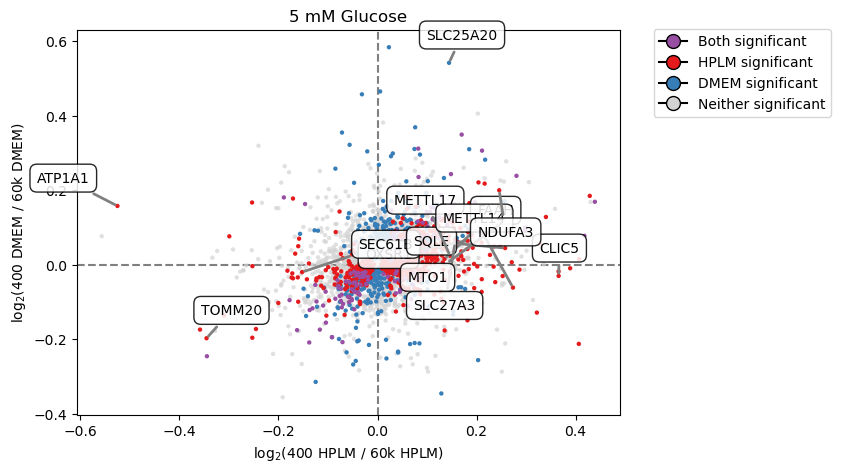

In [49]:
plt.figure(figsize=(7,5), facecolor='white')

ax = plt.gca()

ax.axhline(0, ls='--', color="grey", zorder=0)
ax.axvline(0, ls='--', color="grey", zorder=0)

proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_p'] >= limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#D3D3D3',
    edgecolors='none',
    s=10,
    alpha=0.7,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_p'] >= limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#377eb8',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_p'] < limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#e41a1c',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_p'] < limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#984ea3',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)

low_gluc.loc[(abs(low_gluc['400_vs_60k_in_HPLM_fc']) > 1.2) &
             (low_gluc['400_vs_60k_in_HPLM_p'] < limiter) &
             (low_gluc['400_vs_60k_in_DMEM_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#e41a1c',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)
low_gluc.loc[(abs(low_gluc['400_vs_60k_in_HPLM_fc']) > 1.2) &
             (low_gluc['400_vs_60k_in_HPLM_p'] < limiter) &
             (low_gluc['400_vs_60k_in_DMEM_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#984ea3',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)


ax.set_xlabel("log$_2$(400 HPLM / 60k HPLM)")
ax.set_ylabel("log$_2$(400 DMEM / 60k DMEM)")
ax.set_title("5 mM Glucose")

for index, row in low_gluc.iterrows():
    if abs(row[0]) > 0: 
        _pos = False
        if index == "TOMM20":
            _pos = (40,15)
        if index == "SLC27A3":
            _pos = (15,-50)
        if index == "ATP1A1":
            _pos = (-20,15)
        if index == "OXSR1":
            _pos = (-40,-15)
        if index == "FAAH":
            _pos = (50,30)
        if index == "SEC61B":
            _pos = (80,15)
        if index == "SQLE":
            _pos = (-40,0)
        if index == "METTL17":
            _pos = (5,35)
        if index == "METTL14":
            _pos = (-5,45)
        if index == "MTO1":
            _pos = (-40,-45)
        if index == "CLIC5":
            _pos = (15,15)
        
        if _pos != False:
            ax.annotate(
                  index,
                  xy=(row[0], row[1]), xytext=_pos,
                  textcoords='offset points', ha='right', va='bottom',
                  bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.85),
                  arrowprops=dict(arrowstyle='-', color='grey', linewidth=2, connectionstyle='arc3,rad=0')
               )
            
for index, row in proteomics_results.iterrows():
    _pos = False
    
    if index == "NDUFA3":
        _pos = (25,-35)
    if index == "SLC25A20":
        _pos = (35,15)
    if _pos != False:
        ax.annotate(
              index,
              xy=(row[0], row[1]), xytext=_pos,
              textcoords='offset points', ha='right', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.85),
              arrowprops=dict(arrowstyle='-', color='grey', linewidth=2, connectionstyle='arc3,rad=0')
           )

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='black', label='Both significant', markerfacecolor='#984ea3', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='HPLM significant', markerfacecolor='#e41a1c', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='DMEM significant', markerfacecolor='#377eb8', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='Neither significant', markerfacecolor='#D3D3D3', markersize=10)
                  ]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.02), facecolor='white')
        
        
# Save and show figure
plt.savefig(
    os.path.join("../plots", "proteomics_400_vs_60k_HPLM_vs_DMEM.png"),
    bbox_inches='tight',
    dpi=600,
    facecolor=ax.get_facecolor()
)

### High glucose 2D volcano plot

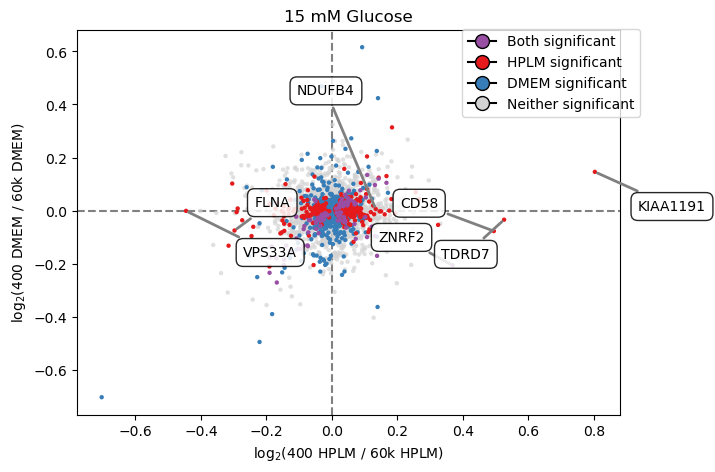

In [50]:
plt.figure(figsize=(7,5), facecolor='white')

ax = plt.gca()

ax.axhline(0, ls='--', color="grey", zorder=0)
ax.axvline(0, ls='--', color="grey", zorder=0)

proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#D3D3D3',
    edgecolors='none',
    s=10,
    alpha=0.7,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#377eb8',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#e41a1c',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#984ea3',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)

hi_gluc.loc[(abs(hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_fc']) > 1.2) &
             (hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) &
             (hi_gluc['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#e41a1c',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)
hi_gluc.loc[(abs(hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_fc']) > 1.2) &
             (hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) &
             (hi_gluc['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#984ea3',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)


ax.set_xlabel("log$_2$(400 HPLM / 60k HPLM)")
ax.set_ylabel("log$_2$(400 DMEM / 60k DMEM)")
ax.set_title("15 mM Glucose")

for index, row in hi_gluc.iterrows():
    if abs(row[2]) > 0: 
        _pos = False
        if index == "FLNA":
            _pos = (40,15)
        if index == "VPS33A":
            _pos = (80,-35)
        if index == "KIAA1191":
            _pos = (80,-30)
        if index == "CD58":
            _pos = (-40,15)
        if index == "TDRD7":
            _pos = (-10,-30)
        if index == "ZNRF2":
            _pos = (-20,15)
        if index == "MON1B":
            _pos = (40,15)
        if index == "NDUFB4":
            _pos = (-15,80)
        if index == "H1-4":
            _pos = (40,15)
        
        if _pos != False:
            ax.annotate(
                  index,
                  xy=(row[2], row[3]), xytext=_pos,
                  textcoords='offset points', ha='right', va='bottom',
                  bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.85),
                  arrowprops=dict(arrowstyle='-', color='grey', linewidth=2, connectionstyle='arc3,rad=0')
               )

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='black', label='Both significant', markerfacecolor='#984ea3', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='HPLM significant', markerfacecolor='#e41a1c', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='DMEM significant', markerfacecolor='#377eb8', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='Neither significant', markerfacecolor='#D3D3D3', markersize=10)
                  ]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.02), facecolor='white')
        
        
# Save and show figure
plt.savefig(
    os.path.join("../plots", "proteomics_400_vs_60k_HPLM_vs_DMEM_15mMGlucose.png"),
    bbox_inches='tight',
    dpi=600,
    facecolor=ax.get_facecolor()
)

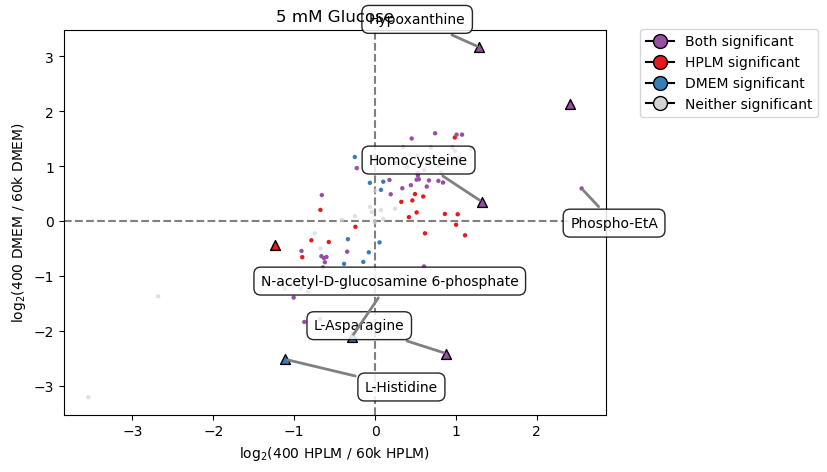

In [51]:
plt.figure(figsize=(7,5), facecolor='white')

ax = plt.gca()

ax.axhline(0, ls='--', color="grey", zorder=0)
ax.axvline(0, ls='--', color="grey", zorder=0)

metabolomics_results.loc[
    (metabolomics_results['400_vs_60k_in_HPLM_p'] >= limiter) & 
    (metabolomics_results['400_vs_60k_in_DMEM_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#D3D3D3',
    edgecolors='none',
    s=10,
    alpha=0.7,
    grid=False,
    ax=ax)
metabolomics_results.loc[
    (metabolomics_results['400_vs_60k_in_HPLM_p'] >= limiter) & 
    (metabolomics_results['400_vs_60k_in_DMEM_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#377eb8',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
metabolomics_results.loc[
    (metabolomics_results['400_vs_60k_in_HPLM_p'] < limiter) & 
    (metabolomics_results['400_vs_60k_in_DMEM_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#e41a1c',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
metabolomics_results.loc[
    (metabolomics_results['400_vs_60k_in_HPLM_p'] < limiter) & 
    (metabolomics_results['400_vs_60k_in_DMEM_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#984ea3',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)

metabolomics_results.loc[(((abs(metabolomics_results['400_vs_60k_in_HPLM_fc']) > 1.2) &
             (abs(metabolomics_results['400_vs_60k_in_HPLM_fc']) < 3)) |
             (abs(metabolomics_results['400_vs_60k_in_DMEM_fc']) > 2)) &
             (metabolomics_results['400_vs_60k_in_HPLM_p'] < limiter) &
             (metabolomics_results['400_vs_60k_in_DMEM_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#e41a1c',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)

metabolomics_results.loc[(((abs(metabolomics_results['400_vs_60k_in_HPLM_fc']) > 1.2) &
             (abs(metabolomics_results['400_vs_60k_in_HPLM_fc']) < 2.5)) |
             (abs(metabolomics_results['400_vs_60k_in_DMEM_fc']) > 2)) &
             (metabolomics_results['400_vs_60k_in_HPLM_p'] >= limiter) &
             (metabolomics_results['400_vs_60k_in_DMEM_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#377eb8',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)

metabolomics_results.loc[(((abs(metabolomics_results['400_vs_60k_in_HPLM_fc']) > 1.2) &
             (abs(metabolomics_results['400_vs_60k_in_HPLM_fc']) < 2.5)) |
             (abs(metabolomics_results['400_vs_60k_in_DMEM_fc']) > 2)) &
             (metabolomics_results['400_vs_60k_in_HPLM_p'] < limiter) &
             (metabolomics_results['400_vs_60k_in_DMEM_p'] < limiter) &
             (
                 ~((metabolomics_results['400_vs_60k_in_HPLM_fc'] < -2) &
                 (metabolomics_results['400_vs_60k_in_DMEM_fc'] < -2))
             
             )].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#984ea3',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)

ax.set_xlabel("log$_2$(400 HPLM / 60k HPLM)")
ax.set_ylabel("log$_2$(400 DMEM / 60k DMEM)")
ax.set_title("5 mM Glucose")

for index, row in metabolomics_results.iterrows():
    if abs(row[0]) > 0: 
        _pos = False
        if index == "L-Asparagine":
            _pos = (-30,15)
        if index == "N-acetyl-D-glucosamine 6-phosphate":
            _pos = (120,35)
        if index == "L-Histidine":
            _pos = (110,-25)
        if index == "Hypoxanthine":
            _pos = (-10,15)
        if index == "Phospho-EtA":
            _pos = (55,-30)
        if index == "Homocysteine":
            _pos = (-10,25)
        
        if _pos != False:
            ax.annotate(
                  index,
                  xy=(row[0], row[1]), xytext=_pos,
                  textcoords='offset points', ha='right', va='bottom',
                  bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.85),
                  arrowprops=dict(arrowstyle='-', color='grey', linewidth=2, connectionstyle='arc3,rad=0')
               )

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='black', label='Both significant', markerfacecolor='#984ea3', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='HPLM significant', markerfacecolor='#e41a1c', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='DMEM significant', markerfacecolor='#377eb8', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='Neither significant', markerfacecolor='#D3D3D3', markersize=10)
                  ]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.02), facecolor='white')
        
        
# Save and show figure
plt.savefig(
    os.path.join("../plots", "metabolomics_400_vs_60k_HPLM_vs_DMEM.png"),
    bbox_inches='tight',
    dpi=600,
    facecolor=ax.get_facecolor()
)

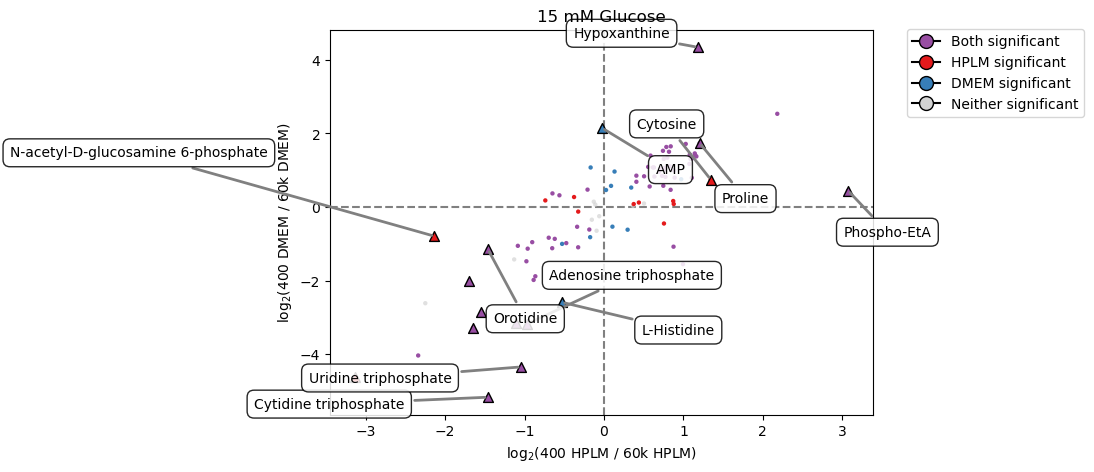

In [52]:
plt.figure(figsize=(7,5), facecolor='white')

ax = plt.gca()

ax.axhline(0, ls='--', color="grey", zorder=0)
ax.axvline(0, ls='--', color="grey", zorder=0)

metabolomics_results.loc[
    (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter) & 
    (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#D3D3D3',
    edgecolors='none',
    s=10,
    alpha=0.7,
    grid=False,
    ax=ax)
metabolomics_results.loc[
    (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter) & 
    (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#377eb8',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
metabolomics_results.loc[
    (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) & 
    (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#e41a1c',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
metabolomics_results.loc[
    (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) & 
    (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#984ea3',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)

metabolomics_results.loc[(((abs(metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fc']) > 1.2) &
             (abs(metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fc']) < 3)) |
             (abs(metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fc']) > 2)) &
             (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) &
             (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#e41a1c',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)

metabolomics_results.loc[(((abs(metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fc']) > 1.2) &
             (abs(metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fc']) < 2.5)) |
             (abs(metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fc']) > 2)) &
             (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter) &
             (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter)].plot.scatter(
     '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#377eb8',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)

metabolomics_results.loc[(((abs(metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fc']) > 1.2) &
             (abs(metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fc']) < 3.5)) |
             (abs(metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fc']) > 2)) &
             (metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) &
             (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter) &
             (
                 ~((metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fc'] > 1.5) &
                 (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fc'] > 1.5))
             
             ) &
             (
                 ~((metabolomics_results['400_vs_60k_in_HPLM_15mM_Glucose_fc'] < -2) &
                 (metabolomics_results['400_vs_60k_in_DMEM_15mM_Glucose_fc'] < -2))
             
             )].plot.scatter(
     '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#984ea3',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)

ax.set_xlabel("log$_2$(400 HPLM / 60k HPLM)")
ax.set_ylabel("log$_2$(400 DMEM / 60k DMEM)")
ax.set_title("15 mM Glucose")

for index, row in metabolomics_results.iterrows():
    if abs(row[2]) > 0: 
        _pos = False
        if index == "Orotidine":
            _pos = (50,-55)
        if index == "N-acetyl-D-glucosamine 6-phosphate":
            _pos = (-120,55)
        if index == "L-Histidine":
            _pos = (110,-25)
        if index == "ADP" and row[2] < 1.2 and row[2] > 0.8:
            _pos = (120,-10)
        if index == "Adenosine triphosphate":
            _pos = (135,30)
        if index == "Uridine triphosphate":
            _pos = (-50,-13)
        if index == "Cytidine triphosphate":
            _pos = (-60,-10)
        if index == "AMP":
            _pos = (60,-35)
        if index == "Hypoxanthine":
            _pos = (-20,5)
        if index == "Phospho-EtA":
            _pos = (60,-35)
        if index == "Proline" and abs(row[2]) > 1.2:
            _pos = (50,-45)
        if index == "Cytosine":
            _pos = (-10,35)
            
        if _pos != False:
            ax.annotate(
                  index,
                  xy=(row[2], row[3]), xytext=_pos,
                  textcoords='offset points', ha='right', va='bottom',
                  bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.85),
                  arrowprops=dict(arrowstyle='-', color='grey', linewidth=2, connectionstyle='arc3,rad=0')
               )

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='black', label='Both significant', markerfacecolor='#984ea3', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='HPLM significant', markerfacecolor='#e41a1c', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='DMEM significant', markerfacecolor='#377eb8', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='Neither significant', markerfacecolor='#D3D3D3', markersize=10)
                  ]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.02), facecolor='white')
        
        
# Save and show figure
plt.savefig(
    os.path.join("../plots", "metabolomics_400_vs_60k_HPLM_vs_DMEM_15mMGlucose.png"),
    bbox_inches='tight',
    dpi=600,
    facecolor=ax.get_facecolor()
)

In [53]:
for x in low_gluc.loc[(abs(low_gluc['400_vs_60k_in_HPLM_fc']) > 1.2) &
             (low_gluc['400_vs_60k_in_HPLM_p'] < limiter) &
             (low_gluc['400_vs_60k_in_DMEM_p'] >= limiter)].index:
    print(x)

In [54]:
for x in hi_gluc.loc[(abs(hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_fc']) > 1.2) &
             (hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) &
             (hi_gluc['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)].index:
    print(x)

In [55]:
for x in low_gluc.loc[(abs(low_gluc['400_vs_60k_in_DMEM_15mM_Glucose_fc']) > 1.2) &
             (low_gluc['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter) &
             (low_gluc['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter)].index:
    print(x)

In [56]:
for x in hi_gluc.loc[(abs(hi_gluc['400_vs_60k_in_DMEM_15mM_Glucose_fc']) > 1.2) &
             (hi_gluc['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter) &
             (hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter)].index:
    print(x)

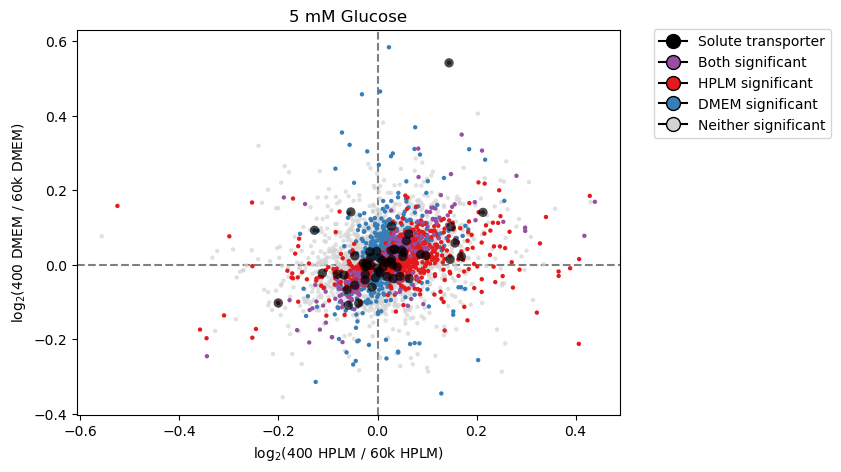

In [57]:
plt.figure(figsize=(7,5), facecolor='white')

ax = plt.gca()

ax.axhline(0, ls='--', color="grey", zorder=0)
ax.axvline(0, ls='--', color="grey", zorder=0)

proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_p'] >= limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#D3D3D3',
    edgecolors='none',
    s=10,
    alpha=0.7,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_p'] >= limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#377eb8',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_p'] < limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#e41a1c',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_p'] < limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#984ea3',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)

low_gluc.loc[(abs(low_gluc['400_vs_60k_in_HPLM_fc']) > 1.2) &
             (low_gluc['400_vs_60k_in_HPLM_p'] < limiter) &
             (low_gluc['400_vs_60k_in_DMEM_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#e41a1c',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)
low_gluc.loc[(abs(low_gluc['400_vs_60k_in_HPLM_fc']) > 1.2) &
             (low_gluc['400_vs_60k_in_HPLM_p'] < limiter) &
             (low_gluc['400_vs_60k_in_DMEM_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='#984ea3',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)

proteomics_results.loc[proteomics_results.index.str.contains("SLC")].plot.scatter(
    '400_vs_60k_in_HPLM_fc', '400_vs_60k_in_DMEM_fc',
    c='black',
    edgecolors='none',
    s=45,
    alpha=0.7,
    grid=False,
    ax=ax)


ax.set_xlabel("log$_2$(400 HPLM / 60k HPLM)")
ax.set_ylabel("log$_2$(400 DMEM / 60k DMEM)")
ax.set_title("5 mM Glucose")

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='black', label='Solute transporter', markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='Both significant', markerfacecolor='#984ea3', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='HPLM significant', markerfacecolor='#e41a1c', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='DMEM significant', markerfacecolor='#377eb8', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='Neither significant', markerfacecolor='#D3D3D3', markersize=10)
                  ]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.02), facecolor='white')
        
        
# Save and show figure
plt.savefig(
    os.path.join("../plots", "proteomics_lowGluc_SLCs.png"),
    bbox_inches='tight',
    dpi=1200,
    facecolor=ax.get_facecolor()
)

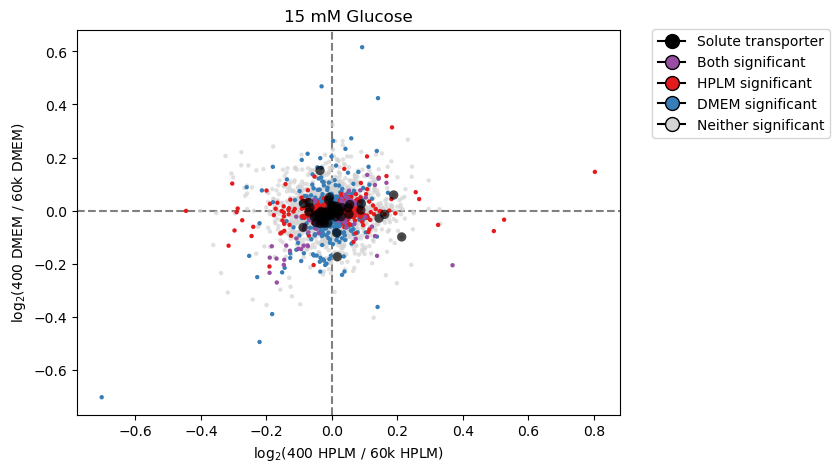

In [58]:
plt.figure(figsize=(7,5), facecolor='white')

ax = plt.gca()

ax.axhline(0, ls='--', color="grey", zorder=0)
ax.axvline(0, ls='--', color="grey", zorder=0)

proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#D3D3D3',
    edgecolors='none',
    s=10,
    alpha=0.7,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] >= limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#377eb8',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#e41a1c',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)
proteomics_results.loc[
    (proteomics_results['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) & 
    (proteomics_results['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#984ea3',
    edgecolors='none',
    s=10,
    alpha=1,
    grid=False,
    ax=ax)

hi_gluc.loc[(abs(hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_fc']) > 1.2) &
             (hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) &
             (hi_gluc['400_vs_60k_in_DMEM_15mM_Glucose_p'] >= limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#e41a1c',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)
hi_gluc.loc[(abs(hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_fc']) > 1.2) &
             (hi_gluc['400_vs_60k_in_HPLM_15mM_Glucose_p'] < limiter) &
             (hi_gluc['400_vs_60k_in_DMEM_15mM_Glucose_p'] < limiter)].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='#984ea3',
    edgecolors='black',
    linewidths=1,
    s=50,
    marker="^",
    alpha=1,
    grid=False,
    ax=ax)

proteomics_results.loc[proteomics_results.index.str.contains("SLC")].plot.scatter(
    '400_vs_60k_in_HPLM_15mM_Glucose_fc', '400_vs_60k_in_DMEM_15mM_Glucose_fc',
    c='black',
    edgecolors='none',
    s=45,
    alpha=0.7,
    grid=False,
    ax=ax)

ax.set_xlabel("log$_2$(400 HPLM / 60k HPLM)")
ax.set_ylabel("log$_2$(400 DMEM / 60k DMEM)")
ax.set_title("15 mM Glucose")


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='black', label='Solute transporter', markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='Both significant', markerfacecolor='#984ea3', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='HPLM significant', markerfacecolor='#e41a1c', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='DMEM significant', markerfacecolor='#377eb8', markersize=10),
                   Line2D([0], [0], marker='o', color='black', label='Neither significant', markerfacecolor='#D3D3D3', markersize=10)
                  ]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.40, 1.02), facecolor='white')
        
        
# Save and show figure
plt.savefig(
    os.path.join("../plots", "proteomics_hiGluc_SLCs.png"),
    bbox_inches='tight',
    dpi=1200,
    facecolor=ax.get_facecolor()
)